In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("..\ml_repo\Datasets\MNIST-2\mnist_train.csv")

In [10]:
df.shape

(42000, 785)

In [11]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [44]:
data = df.values
np.random.shuffle(data)

In [45]:
print(data)

[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


In [46]:
print(type(data))

<class 'numpy.ndarray'>


In [47]:
data.shape

(42000, 785)

In [48]:
X = data[ : , 1: ]
Y = data[ : ,0]

In [49]:
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [50]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
## Try to visualise one image

In [52]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   8,  98, 195, 240, 254, 255, 254, 254, 163, 149,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  18, 228, 254, 254, 254, 254, 254, 254, 254,
       252, 221, 116,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  19, 230, 254, 254, 254, 23

In [53]:
X[0].shape

(784,)

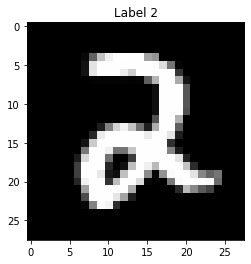

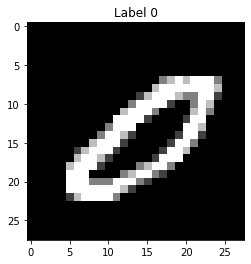

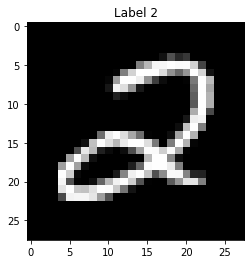

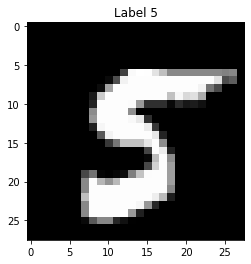

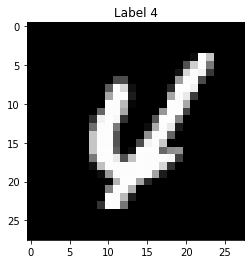

In [54]:
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title("Label " + str(Y[i]))
    plt.show()

for i in range(5):
    
    drawImg(X,Y,i)

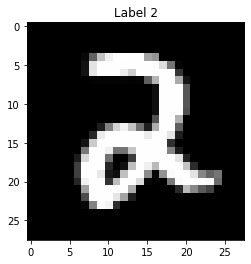

In [55]:
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title("Label " + str(Y[i]))
    plt.show()

drawImg(X,Y,0)

In [56]:
## Split this dataset  => 
split = int(0.80*X.shape[0])
print(split)

33600


In [57]:
X_train, Y_train = X[ :split, : ], Y[:split]
X_test, Y_test = X[split: , : ], Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(33600, 784) (33600,)
(8400, 784) (8400,)


In [58]:
# Randomization
import numpy as np
a = np.array([1,2,3,4,5])
np.random.shuffle(a)
print(a)

[2 5 4 3 1]


In [59]:
# Randomly shuffle a 2D array
a = np.array([[1,2,3],
             [4,5,6],
            [7,8,9]])
np.random.shuffle(a)
print(a)
# elements of the rows are not shuffled => we want this

[[4 5 6]
 [1 2 3]
 [7 8 9]]


<AxesSubplot:>

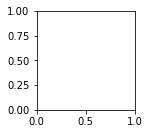

In [61]:
# Try to plot a visualization (Make a grid of first 25 images -> 5x5 grid)

plt.subplot(2,3,1)

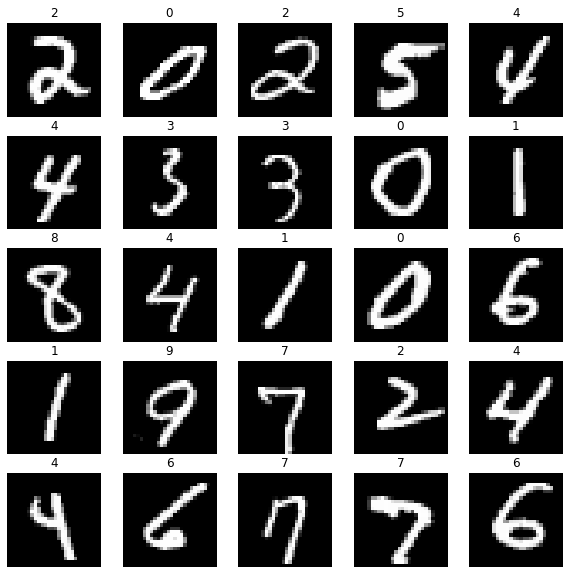

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28,), cmap = 'gray')
    plt.title(Y_train[i])
    plt.axis("off")

In [69]:
# if i dont want to split the train and test data, we can use sklearn library
from sklearn.model_selection import train_test_split

XT, Xt, YT, Yt = train_test_split(X,Y,test_size=0.2, random_state = 5)
print(XT.shape, YT.shape)
print(Xt.shape, Yt.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)
